In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
dtypes = {'ip': 'uint', 'app': 'uint', 
          'device': 'uint', 'os': 'uint', 
          'channel': 'category', 'is_attributed': 'uint'
         }

# import random

# n = 200000000 #number of records in file
# s = 1000000 #desired sample size
# filename = "data.txt"
# skip = sorted(random.sample(range(n),n-s))

path = 'C:/Users/johannes/Documents/kaggle/TalkingData/mnt/ssd/kaggle-talkingdata2/competition_files/'
# df = pd.read_csv(path + 'train_sample.csv')
df = pd.read_csv(path + 'train.csv', dtype=dtypes, nrows = 1000000)
# print(df.head())
# print(df.describe())

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
ip                 1000000 non-null uint32
app                1000000 non-null uint32
device             1000000 non-null uint32
os                 1000000 non-null uint32
channel            1000000 non-null category
click_time         1000000 non-null object
attributed_time    1693 non-null object
is_attributed      1000000 non-null uint32
dtypes: category(1), object(2), uint32(5)
memory usage: 36.2+ MB


In [4]:
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [5]:
df.describe()

,ip,app,device,os,is_attributed
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,86993.581653,12.316655,26.141368,23.067662,0.001693
std,55529.023541,16.216890,273.537010,55.323313,0.041111
min,9.000000,0.000000,0.000000,0.000000,0.000000
25%,42297.000000,3.000000,1.000000,13.000000,0.000000
50%,81725.000000,12.000000,1.000000,18.000000,0.000000
75%,120440.000000,15.000000,1.000000,19.000000,0.000000
max,212773.000000,645.000000,3379.000000,715.000000,1.000000


In [6]:
df.click_time = pd.to_datetime(df.click_time)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
ip                 1000000 non-null uint32
app                1000000 non-null uint32
device             1000000 non-null uint32
os                 1000000 non-null uint32
channel            1000000 non-null category
click_time         1000000 non-null datetime64[ns]
attributed_time    1693 non-null object
is_attributed      1000000 non-null uint32
dtypes: category(1), datetime64[ns](1), object(1), uint32(5)
memory usage: 36.2+ MB


In [8]:
df.apply(lambda x: x.nunique())

ip                 39611
app                  214
device               298
os                   160
channel              154
click_time          1731
attributed_time     1530
is_attributed          2
dtype: int64

In [9]:
df.groupby('ip').size().describe()

count    39611.000000
mean        25.245513
std         84.288111
min          1.000000
25%          3.000000
50%         10.000000
75%         25.000000
max       6437.000000
dtype: float64

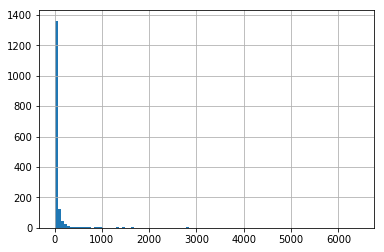

In [10]:
%matplotlib inline
buyers = df[~df.attributed_time.isnull()]
buyers = df[df.ip.isin(buyers.ip)]

buyers.groupby('ip').size().hist(bins = 100)

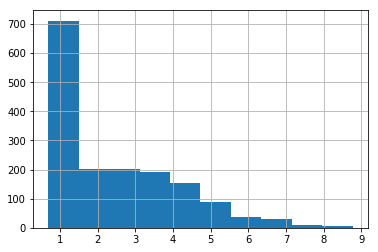

In [11]:
# log og clicks for buyers
np.log1p(buyers.groupby('ip').size()).hist()

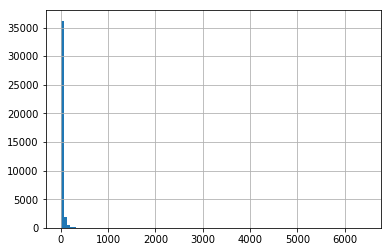

In [12]:
non_buyers = df[df.attributed_time.isnull()]
non_buyers = df[df.ip.isin(non_buyers.ip)]

non_buyers.groupby('ip').size().hist(bins = 100)

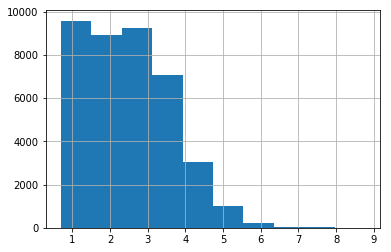

In [13]:
# log of CLicks for non-buyers
np.log1p(non_buyers.groupby('ip').size()).hist()

In [14]:
df['click_time_difference'] = df.groupby('ip').click_time.diff()

In [15]:
df.dtypes

ip                                uint32
app                               uint32
device                            uint32
os                                uint32
channel                         category
click_time                datetime64[ns]
attributed_time                   object
is_attributed                     uint32
click_time_difference    timedelta64[ns]
dtype: object

In [16]:
df['click_time_difference'] = df['click_time_difference'].map(lambda x: x/np.timedelta64(1, 's'))

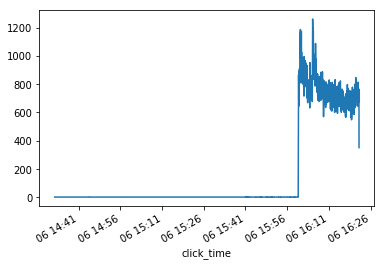

In [17]:
df.groupby('click_time').size().plot()

In [18]:
df.is_attributed.sum()

1693

In [19]:
(df.click_time.max() - df.click_time.min()) / np.timedelta64(1, 's')

6570.0

In [20]:
df['attributed_time'] = pd.to_datetime(df.attributed_time)

In [21]:
(df.attributed_time.max() - df.attributed_time.min()) / np.timedelta64(1,'s')

86084.0

In [22]:
%matplotlib inline
buyers.groupby(['ip']).size().shape

(1632,)

In [23]:
df.ip.unique().shape

(39611,)

In [24]:
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_time_difference
0,83230,3,1,13,379,2017-11-06 14:32:21,NaT,0,NaN
1,17357,3,1,19,379,2017-11-06 14:33:34,NaT,0,NaN
2,35810,3,1,13,379,2017-11-06 14:34:12,NaT,0,NaN
3,45745,14,1,13,478,2017-11-06 14:34:52,NaT,0,NaN
4,161007,3,1,13,379,2017-11-06 14:35:08,NaT,0,NaN


In [25]:
buyers.groupby('ip').is_attributed

In [26]:
buyers.sort_values(['ip','click_time']).head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
613323,39,19,0,24,213,2017-11-06 16:12:35,2017-11-07 05:26:43,1
669198,39,21,1,13,128,2017-11-06 16:13:54,NaN,0
691639,39,14,1,13,123,2017-11-06 16:14:26,NaN,0
786301,39,2,1,13,243,2017-11-06 16:16:43,NaN,0
786302,39,9,1,13,232,2017-11-06 16:16:43,NaN,0


In [27]:
df.dtypes

ip                               uint32
app                              uint32
device                           uint32
os                               uint32
channel                        category
click_time               datetime64[ns]
attributed_time          datetime64[ns]
is_attributed                    uint32
click_time_difference           float64
dtype: object

In [28]:
# pd.DataFrame(, columns = ['clicks','shopped'])
clicks_X_target = pd.concat((df.groupby('ip').size(), df.groupby('ip').is_attributed.max()), axis =1)
clicks_X_target.columns = ['clicks','is_attributed']
clicks_X_target['log_clicks'] = np.log1p(clicks_X_target.clicks)
clicks_X_target['click_time_difference_mean'] = df.groupby('ip').click_time_difference.mean().fillna(0)
clicks_X_target['click_time_difference_std'] = df.groupby('ip').click_time_difference.std().fillna(0)
clicks_X_target['click_time_difference_median'] = df.groupby('ip').click_time_difference.median().fillna(0)
clicks_X_target['click_time_difference_total'] = df.groupby('ip').click_time_difference.sum().fillna(0)
clicks_X_target['log_click_time_difference_mean'] = np.log1p(df.groupby('ip').click_time_difference.mean().fillna(0))
clicks_X_target['log_click_time_difference_std'] = np.log1p(df.groupby('ip').click_time_difference.std().fillna(0))
clicks_X_target['log_click_time_difference_median'] = np.log1p(df.groupby('ip').click_time_difference.median().fillna(0))
clicks_X_target['log_click_time_difference_total'] = np.log1p(df.groupby('ip').click_time_difference.sum().fillna(0))

In [41]:
# df.groupby('ip').attributed_time.apply(lambda x: x if not x.isnull().all() else 0)

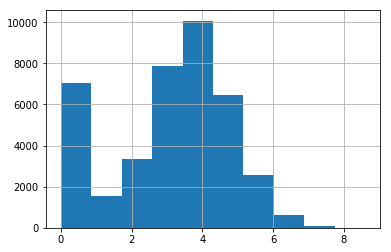

In [30]:
clicks_X_target.log_click_time_difference_mean.hist()

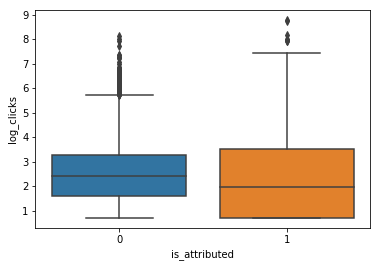

In [31]:
sns.boxplot(x="is_attributed", y="log_clicks", data=clicks_X_target)

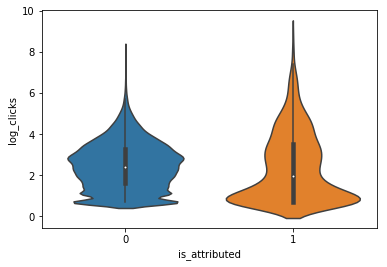

In [32]:
sns.violinplot(x="is_attributed", y="log_clicks", data=clicks_X_target)

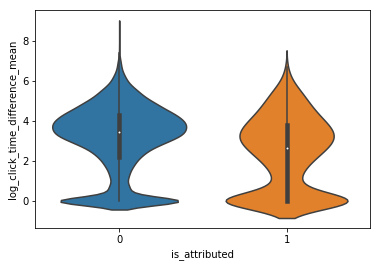

In [33]:
sns.violinplot(x="is_attributed", y="log_click_time_difference_mean", data=clicks_X_target)

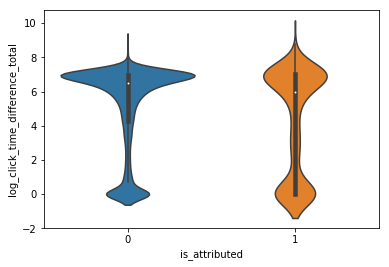

In [34]:
sns.violinplot(x="is_attributed", y="log_click_time_difference_total", data=clicks_X_target)

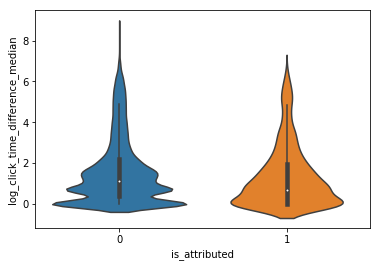

In [35]:
sns.violinplot(x="is_attributed", y="log_click_time_difference_median", data=clicks_X_target)

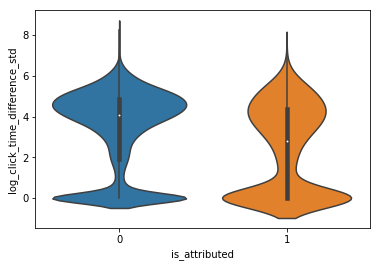

In [36]:
sns.violinplot(x="is_attributed", y="log_click_time_difference_std", data=clicks_X_target)

In [37]:
df.isnull().sum() / df.shape[0]

ip                       0.000000
app                      0.000000
device                   0.000000
os                       0.000000
channel                  0.000000
click_time               0.000000
attributed_time          0.998307
is_attributed            0.000000
click_time_difference    0.039611
dtype: float64

In [38]:
df.is_attributed.value_counts()

0    998307
1      1693
Name: is_attributed, dtype: int64

In [62]:
dir(df.click_time[0])

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_date_repr',
 '_get_field',
 '_get_start_end_field',
 '_has_time_component',
 '_repr_base',
 '_round',
 '_short_repr',
 '_time_repr',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'freq',
 'freqstr',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'm

In [63]:
def decompose_date(df, date_col, drop = True):
    date = df[date_col]
    df['hour'] = date.apply(lambda x: x.hour).astype(np.uint16)
    df['minute'] = date.apply(lambda x: x.minute).astype(np.uint32)
    df['second'] = date.apply(lambda x: x.second).astype(np.uint32)
    
    
    if drop:
        df = df.drop(date_col, axis = 1)
    
    return df

df = decompose_date(df, 'click_time', drop = True)

In [66]:
df.drop('attributed_time', axis = 1, inplace = True)

In [69]:
df.drop('click_time_difference', axis = 1, inplace = True)

In [89]:
ip_size = df.groupby('ip').size()

In [92]:
ip_mean = df.groupby('ip').is_attributed.mean()

In [97]:
new_cols = pd.concat((ip_size, ip_mean), axis =1)
new_cols.columns = ['ip_size','ip_target_mean']
new_cols.reset_index(inplace = True)

In [100]:
df = new_cols.merge(df, how = 'inner', on = 'ip')

(-5, 1000)

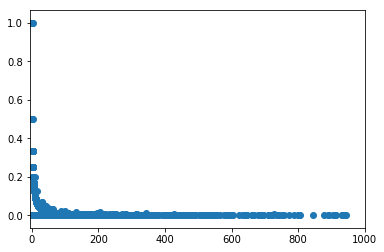

In [88]:
plt.scatter(df.groupby('ip').size().values,  df.groupby('ip').is_attributed.mean().values)
plt.xlim(-5,1000)

In [112]:
l = []
total_targets = df.is_attributed.sum()
total_ips = df.ip.nunique()
for i in range(0,6000,50):
    percentage_of_targets = df[df.ip_size < i].is_attributed.sum() / total_targets
    percentage_of_total = df[df.ip_size > i].ip.nunique() / total_ips
    l.append(percentage_of_targets / percentage_of_total)

Text(0,0.5,'percent_of_total_targets / percent_of_total_ips')

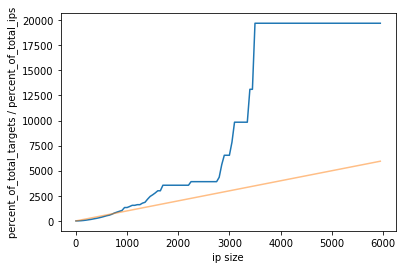

In [116]:
plt.plot(list(range(0,6000,50)), l)
plt.plot(list(range(0,6000,50)), list(range(0,6000,50)), alpha = 0.5)
plt.xlabel('ip size')
plt.ylabel('percent_of_total_targets / percent_of_total_ips')

# plt.xlim(-5,1000)

In [118]:
df[df.ip_size > 1000].shape

(63300, 11)

In [119]:
df.shape

(1000000, 11)

In [75]:
df['ip_app_device'] = df.ip

,ip,app,device,os,channel,is_attributed,hour,minute,second
0,83230,3,1,13,379,0,14,32,21
1,17357,3,1,19,379,0,14,33,34
2,35810,3,1,13,379,0,14,34,12
3,45745,14,1,13,478,0,14,34,52
4,161007,3,1,13,379,0,14,35,8
5,18787,3,1,16,379,0,14,36,26
6,103022,3,1,23,379,0,14,37,44
7,114221,3,1,19,379,0,14,37,59
8,165970,3,1,13,379,0,14,38,10
9,74544,64,1,22,459,0,14,38,23


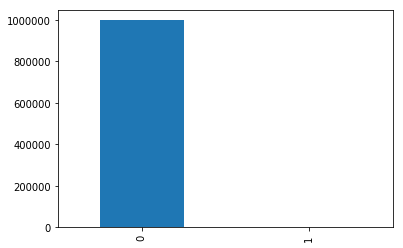

In [39]:
from collections import Counter
df.is_attributed.value_counts().plot(kind = 'bar')

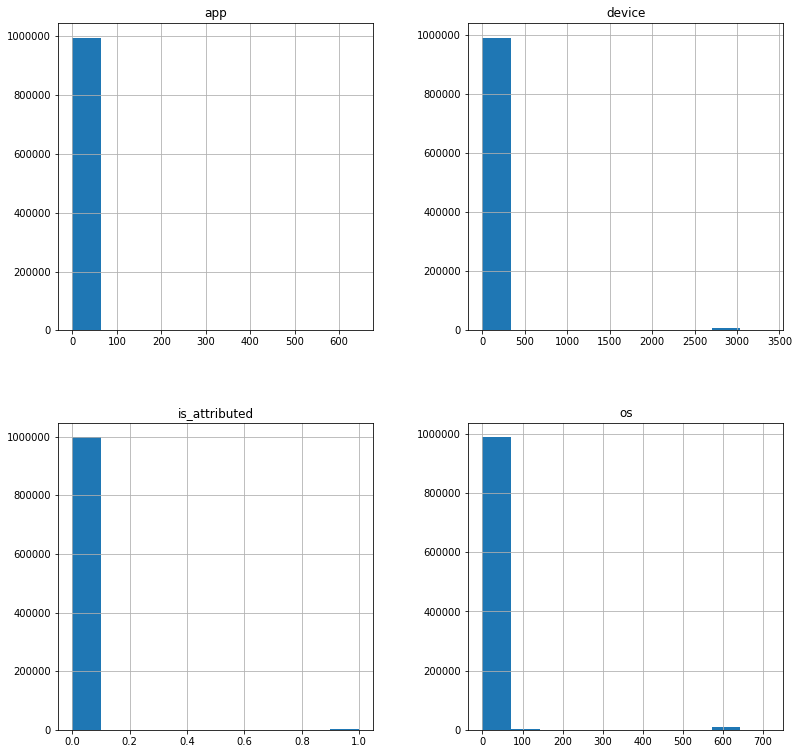

In [40]:
df[['app', 'device', 'os', 'channel', 'is_attributed']].hist(figsize=(13,13))
plt.show()

In [ ]:
sns.pairplot(df[['app', 'device', 'os', 'channel', 'is_attributed']], hue="is_attributed")
plt.show()

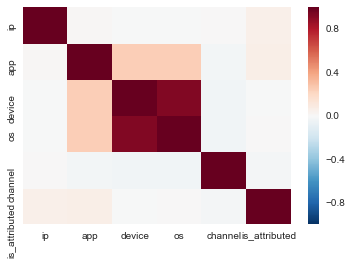

In [25]:
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)